In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape
from sklearn.metrics import accuracy_score

In [22]:
def plot_one_image(data, labels, img_idx):
  my_img   = data[img_idx, :].squeeze().reshape([150,150,3]).copy()
  my_label = labels[img_idx]
  print('label: %s'%my_label)
  fig, ax = plt.subplots(1,1)

  img = ax.imshow(my_img, extent=[-1,1,-1,1])

  x_label_list = [0, 8, 16, 24, 32]
  y_label_list = [0, 8, 16, 24, 32]

  ax.set_xticks([-1, -0.5, 0, 0.5, 1])
  ax.set_yticks([-1, -0.5, 0, 0.5, 1])

  ax.set_xticklabels(x_label_list)
  ax.set_yticklabels(y_label_list)

  fig.show(img)

In [68]:
def CNNClassifier(num_epochs=30):
  def create_model():
    model = Sequential()
    model.add(Reshape((150, 150, 3)))
    model.add(Conv2D(150, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(150, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())

    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3))
    model.add(Activation('softmax'))

    
    opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

   
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])
    return model
  return KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)

In [20]:
IMG_SIZE = 150

DATADIR = "RecycleSortingML-main\\trashify-image-dataset"
    
CATEGORIES = ['metal', 'paper', 'plastic']

for category in CATEGORIES :
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)

training_data = []

def create_training_data():
    for category in CATEGORIES :
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

X = [] 
y = [] 

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.asarray(y)

label: 0


C:\Users\ltocc\AppData\Local\Temp\ipykernel_27756\3802831098.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show(img)


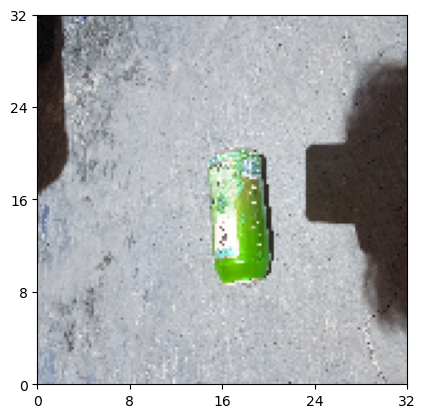

In [26]:
plot_one_image(X, y, 0)

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [69]:
cnn = CNNClassifier()

cnn.fit(np.array(X_train).astype(float), y_train)

predictions = cnn.predict(X_test)

print("CNN Testing Set Score:")
print(accuracy_score(y_test, predictions)*100)

Epoch 1/30


C:\Users\ltocc\AppData\Local\Temp\ipykernel_27756\3505117289.py:34: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  return KerasClassifier(build_fn=create_model, epochs=num_epochs, batch_size=10, verbose=2)


29/29 - 60s - loss: 67.3200 - accuracy: 0.2923 - 60s/epoch - 2s/step
Epoch 2/30
29/29 - 93s - loss: 1.7814 - accuracy: 0.4261 - 93s/epoch - 3s/step
Epoch 3/30
29/29 - 110s - loss: 1.1053 - accuracy: 0.4120 - 110s/epoch - 4s/step
Epoch 4/30
29/29 - 102s - loss: 1.1000 - accuracy: 0.4930 - 102s/epoch - 4s/step
Epoch 5/30
29/29 - 109s - loss: 1.4078 - accuracy: 0.5352 - 109s/epoch - 4s/step
Epoch 6/30
29/29 - 89s - loss: 0.9412 - accuracy: 0.5493 - 89s/epoch - 3s/step
Epoch 7/30
29/29 - 90s - loss: 1.0455 - accuracy: 0.5599 - 90s/epoch - 3s/step
Epoch 8/30
29/29 - 91s - loss: 0.8604 - accuracy: 0.5739 - 91s/epoch - 3s/step
Epoch 9/30
29/29 - 89s - loss: 0.7305 - accuracy: 0.6866 - 89s/epoch - 3s/step
Epoch 10/30
29/29 - 91s - loss: 0.7171 - accuracy: 0.6725 - 91s/epoch - 3s/step
Epoch 11/30
29/29 - 94s - loss: 0.5561 - accuracy: 0.7606 - 94s/epoch - 3s/step
Epoch 12/30
29/29 - 99s - loss: 0.6544 - accuracy: 0.7324 - 99s/epoch - 3s/step
Epoch 13/30
29/29 - 105s - loss: 0.4528 - accuracy: 0

NameError: name 'accuracy_score' is not defined